Exercise 2: making your own data and exploring scikit-learn


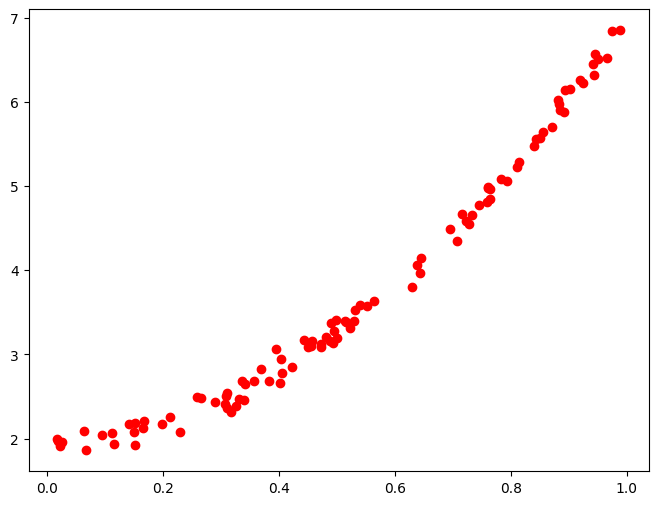

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

plt.figure(figsize = (8, 6))
plt.plot(x, y, 'ro')
plt.show()

1. Write your own code for computing the parametrization of the data set fitting a second-order polynomial.

In [17]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [16]:
x = x.reshape(100)
y = y.reshape(100)

# design matrix as a function of second order polynomial
X[:,0] = 1.0
X[:,1] = x
X[:,2] = x**2

beta = np.linalg.inv(X.T @ X) @ X.T @ y
ytilde = X @ beta # prediction
print(f'R2: {R2(y, ytilde)}')
print(f'MSE: {y, ytilde}')

R2: 0.040425923509810446
MSE: (array([3.20664971, 3.31809432, 6.02747835, 2.12404388, 3.57842979,
       5.55377779, 6.31698319, 2.25467678, 6.56528774, 4.96939451,
       3.12609272, 3.06571626, 3.13163676, 4.97586245, 5.64027991,
       4.34449691, 2.43566687, 2.46609723, 2.38327617, 2.77966601,
       3.18989466, 5.89897429, 2.82869399, 2.18296125, 2.17645254,
       5.28266341, 6.447277  , 4.66053008, 5.07914423, 2.85212556,
       3.1705331 , 3.80295093, 3.10002749, 5.97904349, 3.39255555,
       2.07416214, 3.09081699, 1.97524219, 1.90958473, 4.84239848,
       2.6470534 , 6.25405098, 3.97208234, 4.81226762, 2.09356117,
       2.03849562, 2.54509612, 3.15477278, 3.37248206, 6.50432394,
       5.0644247 , 2.67947801, 2.46199469, 1.93002991, 2.49885477,
       6.15528474, 3.53203102, 4.66726555, 6.84982353, 1.96096129,
       2.51237543, 4.99238022, 3.38390314, 2.68636176, 5.22379695,
       5.57577246, 6.13950899, 3.59297185, 4.54569545, 3.08618898,
       2.48187822, 2.3693069 , 

2.Use thereafter scikit-learn (see again the examples in the slides for week 35) and compare with your own code. Note here that scikit-learn does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept.

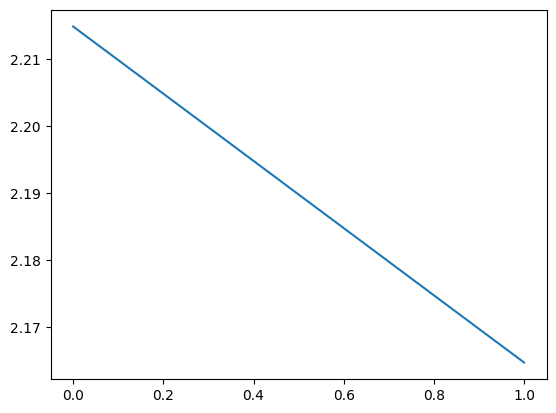

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

x = x.reshape(-1, 1)

n = 50 # number of points
maxdegree = 2 # polynomial degree
polydegree = np.zeros(maxdegree)
error = np.zeros(maxdegree)
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_scaled, y)
    y_fit = clf.predict(x_scaled)
    error[degree] = np.mean( np.mean((y_fit - y)**2) )
    polydegree[degree] = degree


plt.plot(polydegree, error)
#plt.show()


Exercise 3: Split data in test and training data

In [ ]:
np.random.seed()
n = 100
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)